<a href="https://colab.research.google.com/github/yubin8773/2021-deep-learning/blob/main/keras_3_6_210723.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**회귀(regression) 문제**

개별적인 레이블 대신 연속적인 값을 예측

ex) 기상 데이터가 주어졌을 때 내일 기온을 예측하거나, 소프트웨어 명세가 주어졌을 때 소프트웨어 프로젝트가 완료될 시간을 예측

In [7]:
# 보스턴 주택 데이터셋 로드
from keras.datasets import boston_housing
import keras
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [2]:
train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [4]:
# 주택의 중간 가격. 천 달러 단위
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [3]:
# 데이터 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

# 테스트 데이터를 정규화할 때 사용한 값이 훈련 데이터에서 계산한 값임을 주의
# 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안됨

In [8]:
# 모델 정의
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
                         input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss = 'mse', metrics =[keras.metrics.MAE])
  return model

# 마지막 층은 하나의 유닛을 가지고 있고 활성화 함수가 없음 = 선형층이라고 부름
# 전형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성
# 활성화 함수가 없어서 출력 값의 범위를 제한하지 않기 때문에 어떤 범위의 값이라도 예측하도록 자유롭게 학습됨
# mse 손실 함수 = 평균 제곱 오차의 약어. 예측과 타깃 사이 거리의 제곱. 회귀 문제에서 널리 사용됨

In [7]:
# 데이터 포인트가 많지 않기 때문에 검증 세트도 매우 작아짐(약 100개) -> 검증 세트와 훈련 세트로 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라짐.
# 검증 세트의 분할에 대한 검증 점수의 분산이 높음 -> 신뢰있는 모델 평가를 할 수 없음 => K-겹 교차 검증이 가장 좋은 방법
# 데이터를 K개의 분할(폴드 fold)로 나누고 K개의 모델을 각각 만들어 k-1개의 분할에서 훈련하고 나머지 분할에서 평가하는 방법. 모델의 검증 점수는 k개의 검증 점수 평균임.

In [14]:
# K-겹 검증하기
import numpy as np

k=4 # 일반적으로 4 또는 5
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate( # 다른 분할 전체
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis = 0
  ) 
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis = 0
  ) 

  model = build_model() # 케라스 모델 구성
  history = model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size = 1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [15]:
history.history

{'loss': [149.85765075683594,
  117.02383422851562,
  98.28941345214844,
  91.44205474853516,
  79.91923522949219,
  68.23530578613281,
  63.83069610595703,
  59.357582092285156,
  56.611942291259766,
  51.868106842041016,
  47.627071380615234,
  46.322998046875,
  45.320709228515625,
  38.2877197265625,
  40.78493118286133,
  37.73298263549805,
  35.19384002685547,
  33.607723236083984,
  30.971715927124023,
  32.47943878173828,
  29.317279815673828,
  29.50950050354004,
  29.196147918701172,
  27.803281784057617,
  28.410409927368164,
  26.858837127685547,
  25.846176147460938,
  23.020099639892578,
  24.043258666992188,
  24.042402267456055,
  24.780439376831055,
  22.296005249023438,
  24.674591064453125,
  23.575366973876953,
  22.653369903564453,
  22.298702239990234,
  21.088186264038086,
  21.377382278442383,
  21.16936492919922,
  22.634803771972656,
  19.805126190185547,
  19.26504898071289,
  19.75824546813965,
  17.62645149230957,
  19.275800704956055,
  18.99015998840332,


In [9]:
all_scores

[2.0616257190704346, 2.5026261806488037, 2.474949359893799, 2.685807228088379]

In [10]:
np.mean(all_scores)

2.431252121925354

In [17]:
# 각 폴드에서 검증 점수를 로그에 저장
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('처리중인 폴드 #', i)
  val_data = train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets = train_targets[i*num_val_samples: (i+1)*num_val_samples]

  partial_train_data = np.concatenate( # 다른 분할 전체
      [train_data[:i*num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis = 0
  ) 
  partial_train_targets = np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis = 0) 

  model = build_model() # 케라스 모델 구성
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_targets),
                      epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mean_absolute_error']
  all_mae_histories.append(mae_history)

처리중인 폴드 # 0
처리중인 폴드 # 1
처리중인 폴드 # 2
처리중인 폴드 # 3


In [ ]:
history.history

In [18]:
# k-겹 검증 점수 평균 기록
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

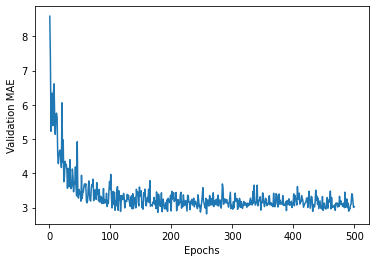

In [20]:
# 검증 점수 그래프
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

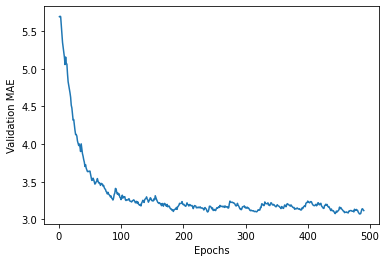

In [21]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그리기
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1-factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()